In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Intro to Probablity

Probability is a branch in mathematics in charge of quantifying the chances of things happening

We will speak about:

1. Expected vs experimental probability
2. Law of large numbers
3. Different techniques for calcuating probabilities
4. Conditional probability
5. Bayes theorem

# Expected vs Experimental Probability

Expected probability is the real probability of an event happening in the world. For example, if I flip a fair coin, the chance (probability) of me getting heads is 0.5

Experimental probability is what I actually get when I run n experiments. As we will soon prove, it doesn't necessarily mean the same.

## Law of Large Numbers

### Explanation

The <b> law of large numbers </b> states that the more experiments I do, the closer the experimental result will be to the expected probability. When tossing a coin, there are only 2 possibilities, so we will see the result rather quickly. But when there are many possibilities, the <b> average </b> of the experiments is the one that will get closer and closer to the expected probability, not each experiment on its own.

In [2]:
def plot_law_of_large_numbers(num_points):

    random_numbers = np.random.randint(1, 7, num_points)
    
    plt.figure(figsize=(10, 6))
    if num_points > 100:
        plt.plot(random_numbers, marker='o', linestyle='', markersize=8, label='Random Numbers')
    else:
        
        plt.plot(random_numbers, marker='o', linestyle='-')


    plt.axhline(y=3, color='red', linestyle='--', label='y = 3')

    plt.xlabel('Index')
    plt.ylabel('Value')
    plt.title('Random Numbers Plot with Horizontal Line at y = 3')
    plt.legend()

    plt.grid(True)
    
    print('numbers mean', random_numbers.mean()) 

numbers mean 1.6666666666666667


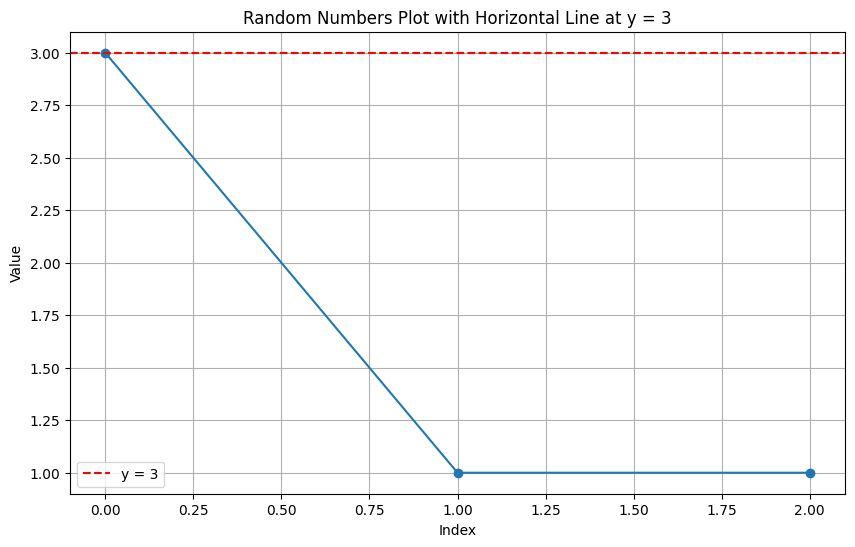

In [3]:
plot_law_of_large_numbers(3)

numbers mean 4.2


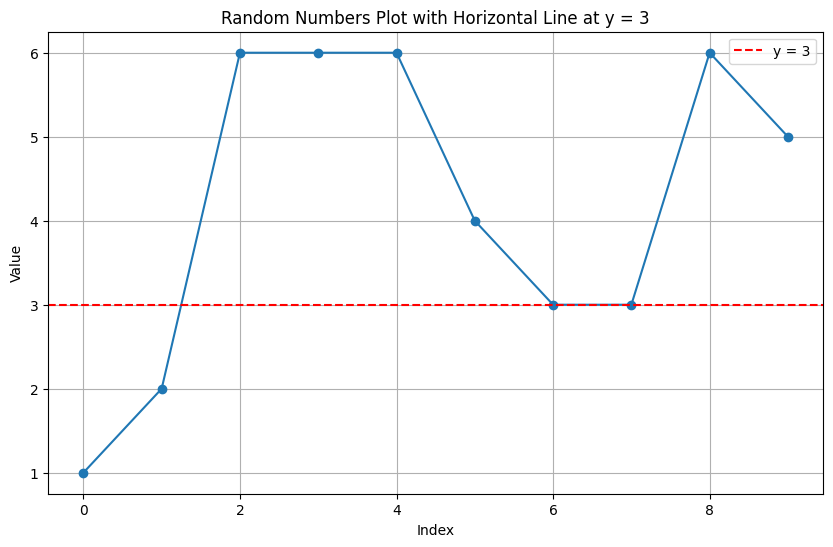

In [4]:
plot_law_of_large_numbers(10)

numbers mean 3.7


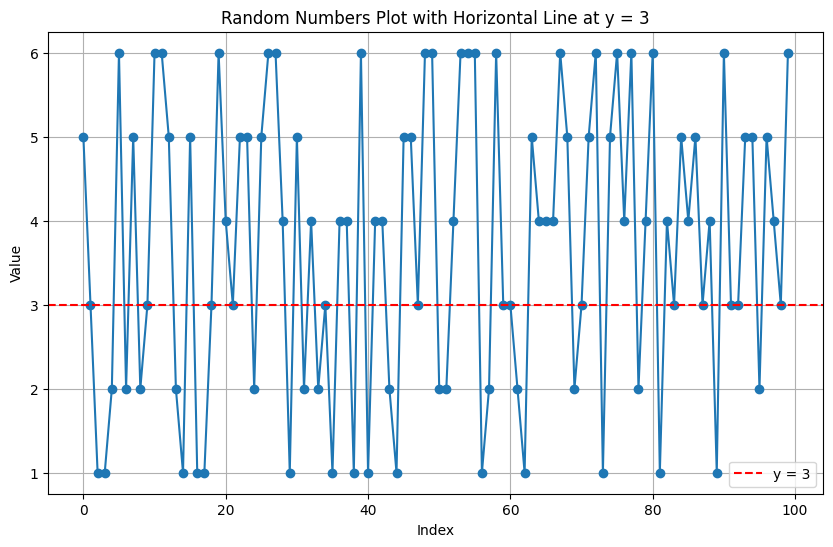

In [5]:
plot_law_of_large_numbers(100)

numbers mean 3.488


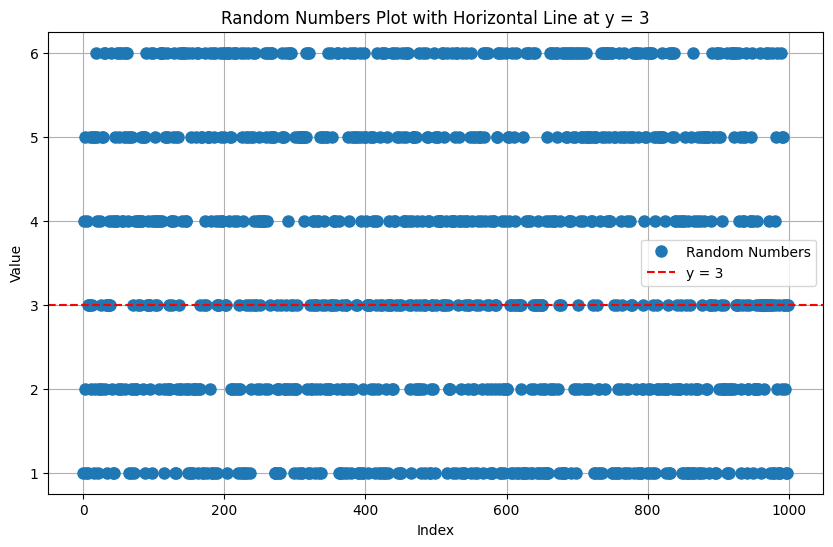

In [6]:
plot_law_of_large_numbers(1000)

### Exercise 

Write a function that proves the law of large numbers. One solution would be writing a function that returns
a number with a probability of 0.5. You can then run it a few times, average the result and then run it many times, averaging the result. If the many times version is closer to the expected probability, this is some evidence that the law of large numbers is more correct

In [47]:
def plot_dnd_d12_results(num_points):

    d12_rolls = np.random.randint(1, 21, num_points)
    
    plt.figure(figsize=(10, 6))
    if num_points > 100:
        plt.plot(d12_rolls, marker='o', linestyle='', markersize=8, label='D12 roll results')
    else:
        
        plt.plot(d12_rolls, marker='o', linestyle='-')


    plt.axhline(y=6.5, color='red', linestyle='--', label='y = 6.5')

    plt.xlabel('Index')
    plt.ylabel('Value')
    plt.title('D12 roll results with Horizontal Line at y = 6.5')
    plt.legend()

    plt.grid(True)
    
    print(f'D12 average: {d12_rolls.mean():.2f}')

D12 average: 5.33


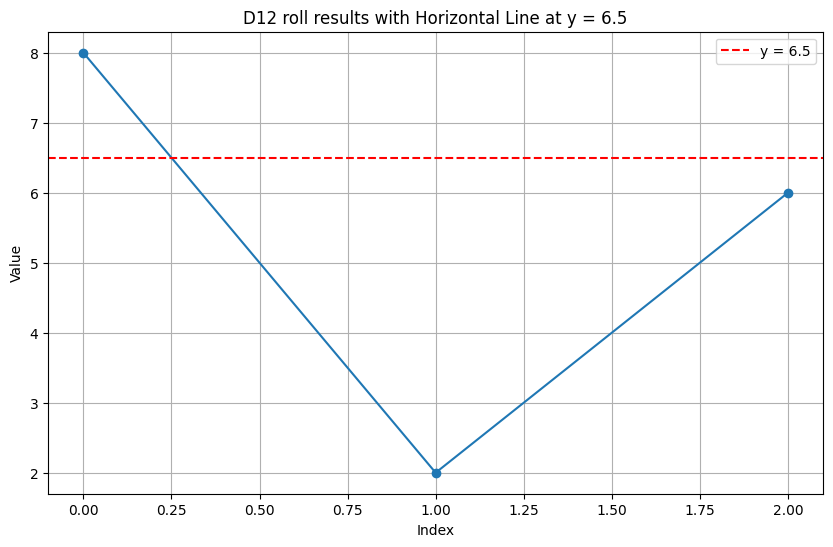

In [48]:
plot_dnd_d12_results(3)

D12 average: 6.70


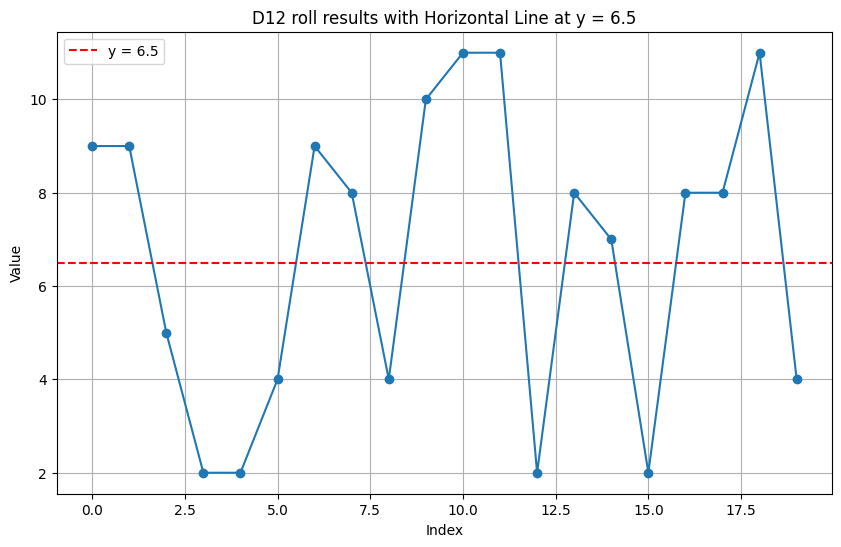

In [49]:
plot_dnd_d12_results(20)

D12 average: 6.35


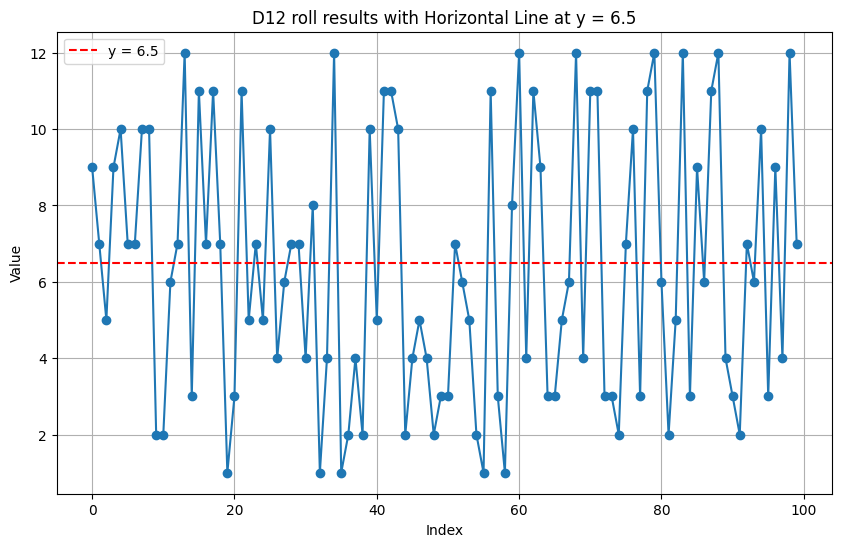

In [50]:
plot_dnd_d12_results(100)

D12 average: 6.41


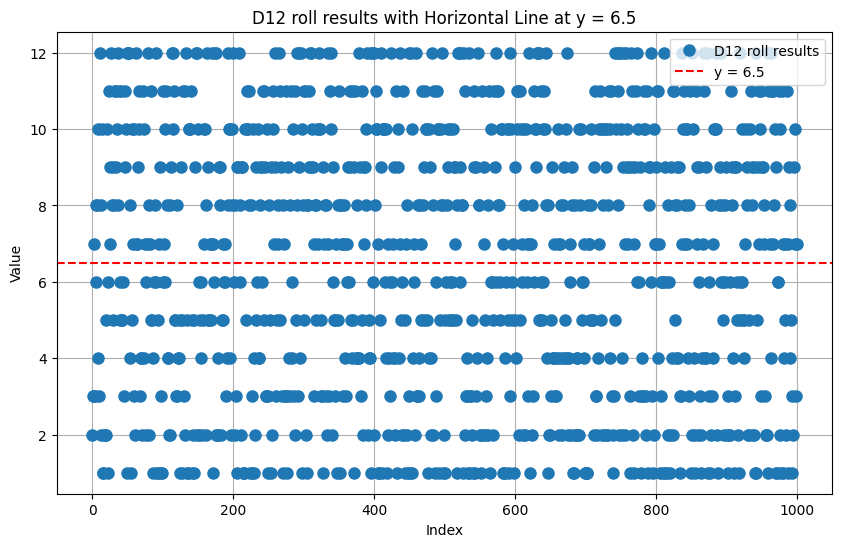

In [51]:
plot_dnd_d12_results(1000)

D12 average: 6.48


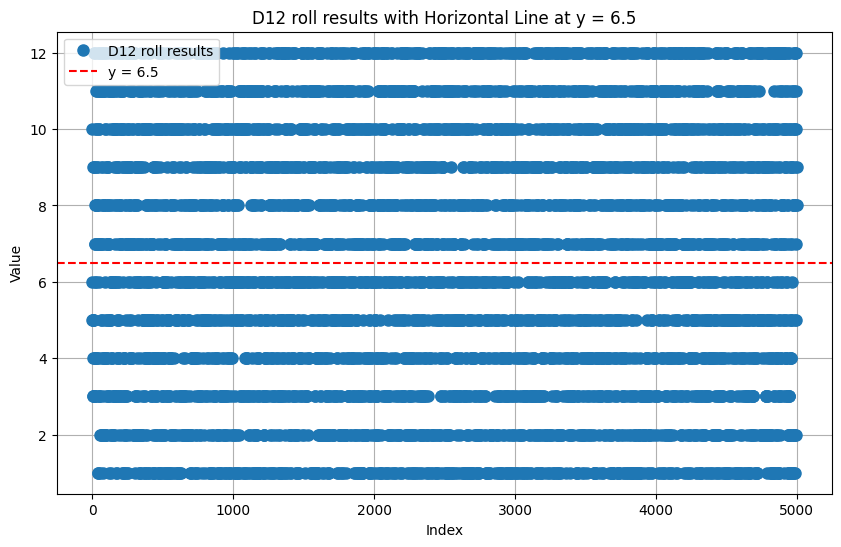

In [52]:
plot_dnd_d12_results(5000)

## Central Limit Thoerem

The central limit theorem states that if I take enough samples of any distribution, even if its not a normal one, and calculate a mean for each sample, these means, will distribute normally.

### Exercise

Prove this theory! 
1. Create a dataset which is not random (feel free to ask a chat for that). Plot it, see that its not normally distributed.  
2. Write code that samples the data randomlly, and calculate each samples's mean.
3. Take all of these samples means and plot their mean. Is it normally distributed? 
4. Start with a small sample, for example 5, plot it. See the result. Move to 50 samples. Is it better? how about a 100?

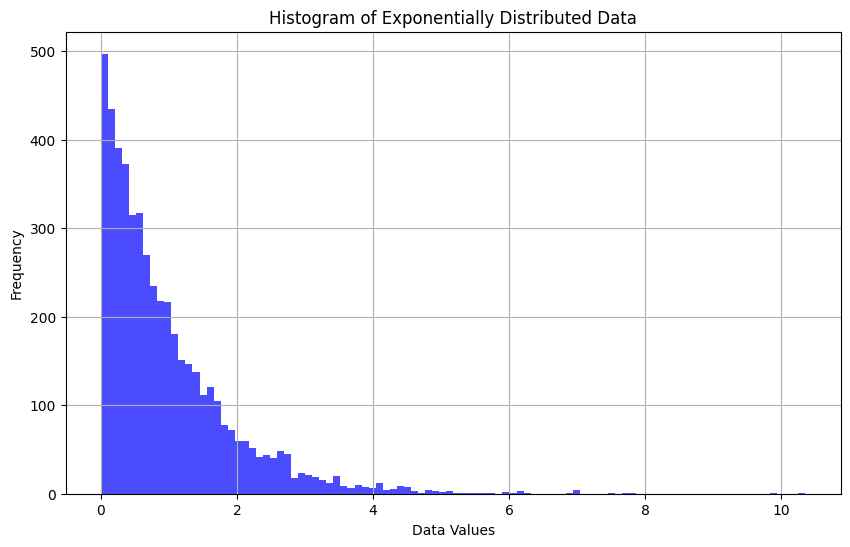

In [108]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Generate a dataset that is not normally distributed (exponential distribution for example)
data = np.random.exponential(scale=1, size=5000)

# Create a pandas DataFrame
df = pd.DataFrame(data, columns=['ExponentialData'])

# Plotting the data
plt.figure(figsize=(10, 6))
plt.hist(df['ExponentialData'], bins=100, alpha=0.7, color='blue')
plt.title('Histogram of Exponentially Distributed Data')
plt.xlabel('Data Values')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [102]:
def random_data_sample(df, sample_size: int, n_samples: int) -> object:
    mean_data = pd.DataFrame(columns=['Mean'])
    index = 0
    for _ in range(n_samples):    
        random_sample = df.sample(n=sample_size)
        sample_mean = np.mean(random_sample)
        mean_data.loc[index] = sample_mean
        index += 1
    plt.hist(x=mean_data, bins=30)  

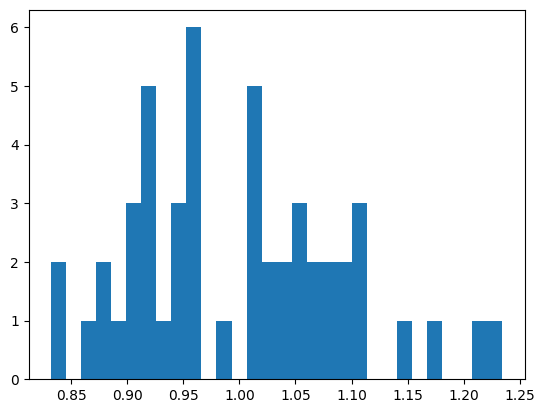

In [104]:
random_data_sample(df=df, sample_size=100, n_samples=50)

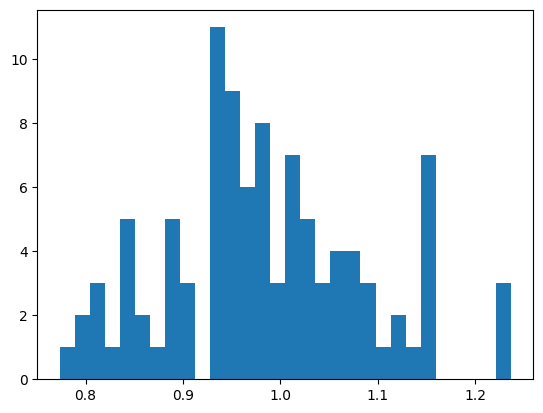

In [105]:
random_data_sample(df=df, sample_size=100, n_samples=100)

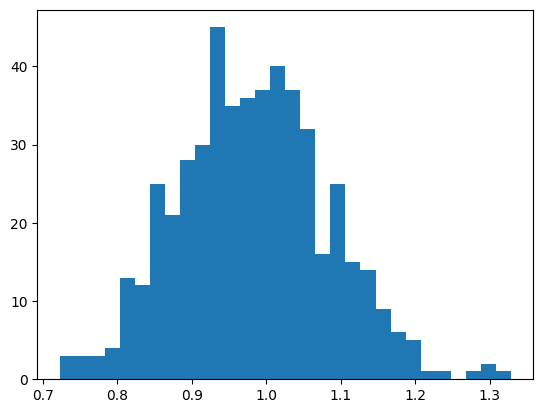

In [106]:
random_data_sample(df=df, sample_size=100, n_samples=500)

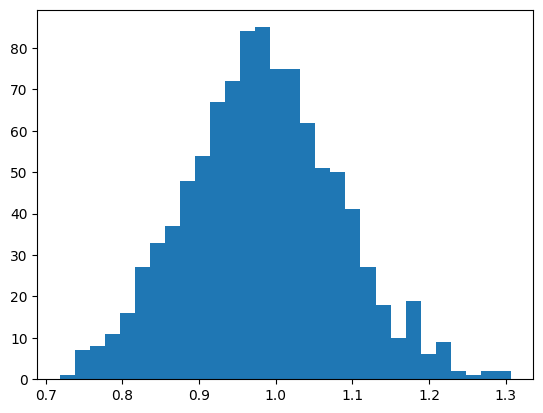

In [107]:
random_data_sample(df=df, sample_size=100, n_samples=1000)

# Calculating Probability

## Exclusive Events, Overlapping Events & the Addition Rule

### Exclusive Events

Exclusive events can't happen together. It either rains, or it doesn't. We need to make sure we understand what it means to rain (one drop? Rains for one second is enough?). If thats the case, lets take a simpler example, rolling a die. Can I roll a 1 and a 6 at the same time? I can't. Can I roll a 3 and an odd number at the same time? I can.

When an event is exclusive, the probability of A <b> and </b> B is 0

$$
P(A \cap B) = 0
$$

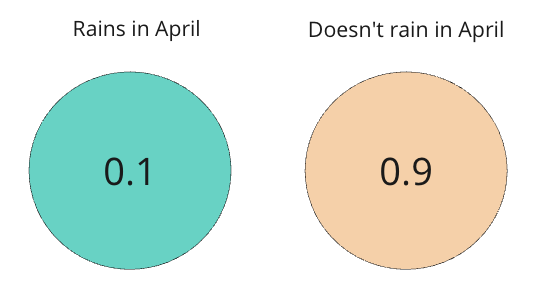

### Overlapping Events

Overlapping events are events that share at least one reuslt. For example if I roll a die. What's my chance of rolling a 3? 1/6. What is my chance of rolling an odd number? 1/2. I can roll 1, 3, or 5. 3 options. One of them, overlapps with the first event.

When an event is exclusive, the probability of A <b> or </b> B is not necessarily 0

$$
P(A \cap B) \neq 0
$$

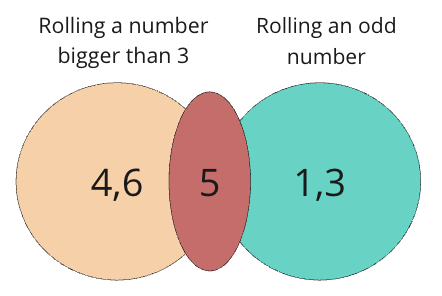

### The Addition Rule

The addition rule helps us calculate probability of some event <b> OR </b> some other event of happening, but not both. For example, rolling a number and another number in a fair die.


$$
P(A \cup B) = P(A) + P(B) - P(A \cap B)
$$

### Exercise

Write a function that calculates the addition rule. The function should calculate the chance of a fair die to roll an odd number <b> OR </b> a number bigger than 3.

What is the result you expect to get?

* Hint: it might be easier to calculate the 1 - (probability of the oppositve. An odd number AND greater than 3)

In [123]:
die_options = {1, 2, 3, 4, 5, 6}
odd_numbers = {i for i in die_options if i % 2 !=0 }
bigger_than_three = {i for i in die_options if i > 3}

{1, 3}

In [140]:
def calculate_roll_probability():
    die_options = {1, 2, 3, 4, 5, 6}
    odd_numbers = {i for i in die_options if i % 2 !=0 }
    bigger_than_three = {i for i in die_options if i > 3}
    
    
    p_odd_numbers = len(odd_numbers) / len(die_options)
    p_bigger_than_three = len(bigger_than_three) / len(die_options)
    
    p_addition =  p_odd_numbers + p_bigger_than_three - (1/6)

    print(f'The probability of rolling a fair die to roll an odd number OR a number bigger than 3 is: {round(p_addition, 3)}')

In [141]:
calculate_roll_probability()

The probability of rolling a fair die to roll an odd number OR a number bigger than 3 is: 0.833


In [150]:
def calculate_roll_probability(n_sides: int) -> str:
    # Create die dimensions
    die_options = [i for i in range(n_sides + 1)]
    odd_numbers = [i for i in die_options if i % 2 !=0]
    bigger_than_three = [i for i in die_options if i > 3]
    combined = [i for i in die_options if i % 2 !=0 and i > 3]
    
    # Calculate probabilities
    p_odd_numbers = len(odd_numbers) / len(die_options)
    p_bigger_than_three = len(bigger_than_three) / len(die_options)
    p_combined = len(combined) / len(die_options)
   
    # Calculate addition rule
    p_addition =  p_odd_numbers + p_bigger_than_three - p_combined

    print(f'The probability of rolling a fair die to roll an odd number OR a number bigger than 3 is: {round(p_addition, 3)}')

In [153]:
calculate_roll_probability(12)

The probability of rolling a fair die to roll an odd number OR a number bigger than 3 is: 0.846


## Conditional Probability

### The Multiplication Rule - Independent Events

The addition rule helps us calculate the probably of some event <b> and </b> some other event of happening. To understand how to use the multiplication rule we must first decide whether the events are conditional or non conditional. A non conditional situation is when the two events are non dependent on each other, For example, rolling a 1 and then rolling a 3

The chances of rolling a 1 and then a 3 are described in the following formula:


$$
P(A \cap B) = P(A) * P(B)
$$

The chance of rolling a 1 is 1/6. The chance of rolling a 3 is the same. The chance of rolling a 1 then a 3, is 1/6 * 1/6 which is 1/36. Its a lower chance of getting each event by itself.

### The Multiplication Rule - Dependent Events

Events are dependent if the occurrence of event A affects the probability of event B. For example, what is the chance of Macabi Tel Aviv winning against Real Madrid? 0.1. Not great. What is the chance of Macabi winning against Real Madrid assuming the score is 10-0 to Tel-Aviv? Much higher, lets say 0.95.

The event (winning) is dependent on the event (goals in the game)

$$
P(A \cap B) = P(A) \cdot P(B|A)
$$


How do we know if an event is dependent or non dependent? If 
$$
P(B|A) = P(B)
$$


Then the events are unrelated

For example, what is the chance of randomlly pulling an ace from a deck of cards? There are 4 aces, 52 cards, so its 4/52, which is 0.08. Now I pull another card, what is the act that is going to decide whether the next card pulling is dependent or non dependent? How can I affect the probability of pulling another Ace?

### Exercise

Write a function that calculates the chance of getting a certain card in a normal cards deck given the events are conditional or non conditional.

The function arguments should be:
1. Number of cards in the deck
2. Amount of specific cards we want to pick
3. Do we return after picking
4. how many times do we pick the next card

In [158]:
n_aces = 4
deck_size = 52
repetition = True

# first event probability calculation
p_first_ace = n_aces / deck_size 

# Calculate if ace is returned
if repetition:
    p_second_ace = n_aces / deck_size
    p_final = p_first_ace * p_second_ace
else:
    n_aces -= 1
    deck_size -= 1
    p_second_ace_give_first_ace_removed = n_aces / deck_size
    p_final = p_first_ace * p_second_ace_give_first_ace_removed

round(p_final, 4)

0.0059

In [ ]:
def calculate_ace_draw_probability(repetition=True):
    deck_size = 52
    repetition = True

# first event probability calculation
p_first_ace = n_aces / deck_size 

# Calculate if ace is returned
if repetition:
    p_second_ace = n_aces / deck_size
    p_final = p_first_ace * p_second_ace
else:
    while n_aces > 0 and deck_size > 0:
        n_aces -= 1
        deck_size -= 1
        p_second_ace_give_first_ace_removed = n_aces / deck_size
        p_final = p_first_ace * p_second_ace_give_first_ace_removed
    else:
        
        

### Exercise

What is the probabily of the following events?

1. tossing a coin once and getting head.
2. tossing a coin twice, getting head and then tail.
3. tossing a coin 3 times - getting head, head, and either head or tail.
4. Tossing a coin getting either head or tail, then tail

## Bayes Theorem

Somewhat alike to the multiplication rule for dependent events, the bayes theorem helps us calculate the probability of an event happening, given another one has happened. In contrary to the multiplicaiton rule we do not calculate the probability of two events happening together, but one event, given that something else has already happened.

$$
P(A|B) = \frac{P(B|A) \times P(A)}{P(B)}
$$


### Exercise

Let's say we choose 2 football teams from our league. Team 1 wins 50% of the time. Team 2 wins 10% percent of the time. Team 1 played twice as many games as team 2.

Given a team has won, what is the chance it was team 2?. 

Event B - a team has won.

Event A - the team that played is team 2

P(A|B) - Given a team has won (B), what is the chance it was team 2 (A)?

The result is around 9%